# Классификация ирисов (Iris Dataset)
Задача: по 4 параметрам цветка (длина/ширина чашелистика и лепестка) предсказать вид ириса из 3 классов: Setosa, Versicolor, Virginica.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
class_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']

print("Размер датасета:", X.shape)
print("Классы:", class_names)
print("\nРаспределение классов:")
print(y.value_counts().rename({i: class_names[i] for i in range(3)}))
print("\nПервые 5 строк:")
display(X.head())
print("\nОписательная статистика:")
display(X.describe())

Размер датасета: (150, 4)
Классы: ['setosa' 'versicolor' 'virginica']

Распределение классов:
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Первые 5 строк:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Описательная статистика:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


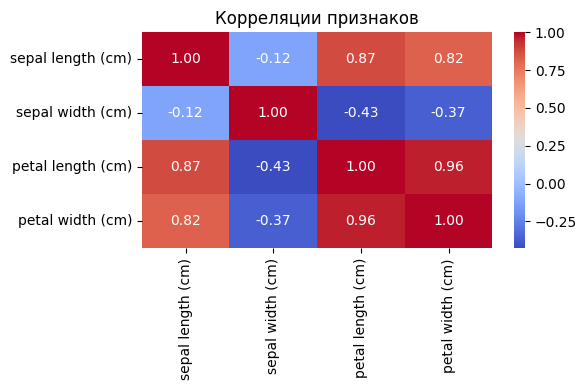

In [37]:
df_vis = X.copy()
df_vis['species'] = [class_names[i] for i in y]

# sns.pairplot(df_vis, hue='species', palette='Set1')
# plt.suptitle('Попарные зависимости признаков', y=1.02)
# plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляции признаков')
plt.tight_layout()
plt.show()

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = []

def evaluate(name, model, X_data, y_true):
    model.fit(X_data, y_true)
    y_pred = model.predict(X_data)
    acc  = metrics.accuracy_score(y_true, y_pred)
    f1   = metrics.f1_score(y_true, y_pred, average='macro')
    prec = metrics.precision_score(y_true, y_pred, average='macro')
    rec  = metrics.recall_score(y_true, y_pred, average='macro')

    print(f" {name}")
    print(f" Accuracy:  {acc:.4f}")
    print(f" F1 (macro):{f1:.4f}")
    print(f" Precision: {prec:.4f}")
    print(f" Recall:    {rec:.4f}")

    cm = metrics.confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    return acc, f1

## 1. Логистическая регрессия

 Логистическая регрессия
 Accuracy:  0.8933
 F1 (macro):0.8926
 Precision: 0.8993
 Recall:    0.8933


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


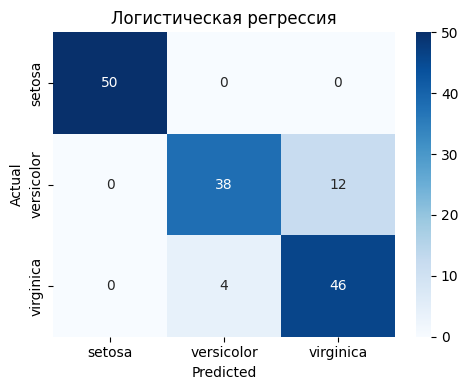

In [39]:
from sklearn.linear_model import LogisticRegression

acc, f1 = evaluate(
    'Логистическая регрессия',
    LogisticRegression(max_iter=1000, C=0.5, class_weight='balanced', solver='liblinear', multi_class='ovr'),
    X_scaled, y
)
results.append({'Модель': 'Logistic Regression', 'Accuracy': acc, 'F1': f1})

## 2. Метод опорных векторов (SVM)

 SVM без ядра (LinearSVC)
 Accuracy:  0.9467
 F1 (macro):0.9466
 Precision: 0.9471
 Recall:    0.9467


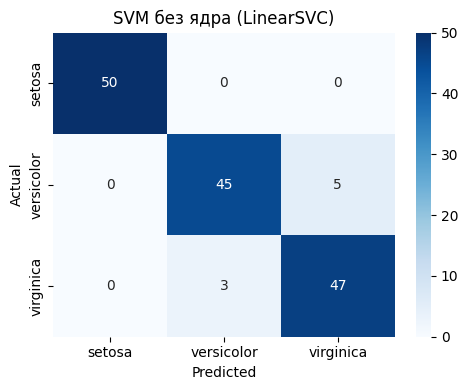

 SVM — линейное ядро
 Accuracy:  0.9867
 F1 (macro):0.9867
 Precision: 0.9867
 Recall:    0.9867


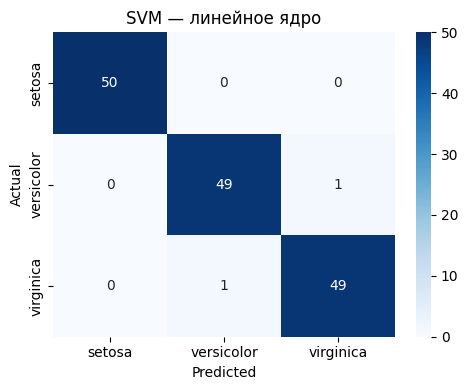

 SVM — гауссово ядро (RBF)
 Accuracy:  0.9733
 F1 (macro):0.9733
 Precision: 0.9733
 Recall:    0.9733


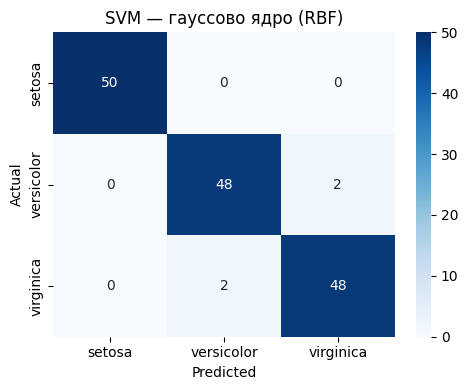

 SVM — полиномиальное ядро (degree=3)
 Accuracy:  0.9533
 F1 (macro):0.9531
 Precision: 0.9591
 Recall:    0.9533


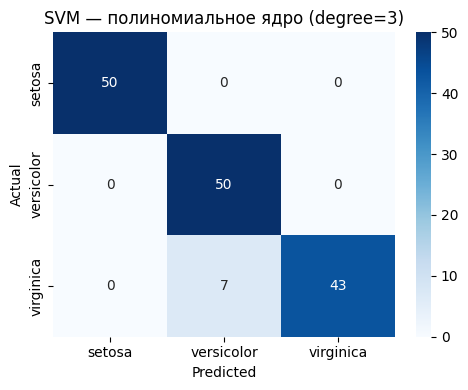

In [40]:
from sklearn.svm import SVC, LinearSVC

# 2.1 Без ядра
acc, f1 = evaluate('SVM без ядра (LinearSVC)', LinearSVC(max_iter=5000, C=0.5), X_scaled, y)
results.append({'Модель': 'SVM без ядра', 'Accuracy': acc, 'F1': f1})

# 2.2 Линейное ядро
acc, f1 = evaluate('SVM — линейное ядро', SVC(kernel='linear', C=0.5), X_scaled, y)
results.append({'Модель': 'SVM linear', 'Accuracy': acc, 'F1': f1})

# 2.3 Гауссово ядро (RBF)
acc, f1 = evaluate('SVM — гауссово ядро (RBF)', SVC(kernel='rbf', C=1.0, gamma='scale'), X_scaled, y)
results.append({'Модель': 'SVM RBF', 'Accuracy': acc, 'F1': f1})

# 2.4 Полиномиальное ядро
acc, f1 = evaluate('SVM — полиномиальное ядро (degree=3)', SVC(kernel='poly', degree=3, C=1.0), X_scaled, y)
results.append({'Модель': 'SVM poly', 'Accuracy': acc, 'F1': f1})

## 3. Метод ближайших соседей (KNN)

 KNN (k=5)
 Accuracy:  0.9533
 F1 (macro):0.9533
 Precision: 0.9534
 Recall:    0.9533


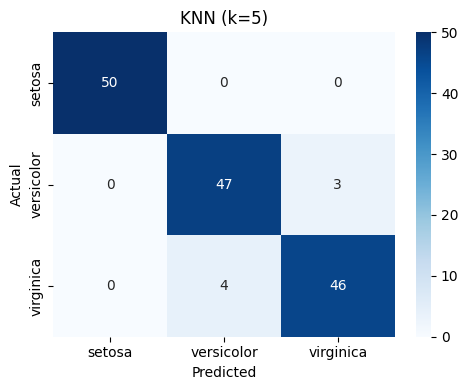

In [41]:
from sklearn.neighbors import KNeighborsClassifier

acc, f1 = evaluate('KNN (k=5)', KNeighborsClassifier(n_neighbors=5), X_scaled, y)
results.append({'Модель': 'KNN', 'Accuracy': acc, 'F1': f1})

## 4. Многослойный перцептрон (MLP)

 MLP (100-50)
 Accuracy:  0.9867
 F1 (macro):0.9867
 Precision: 0.9867
 Recall:    0.9867


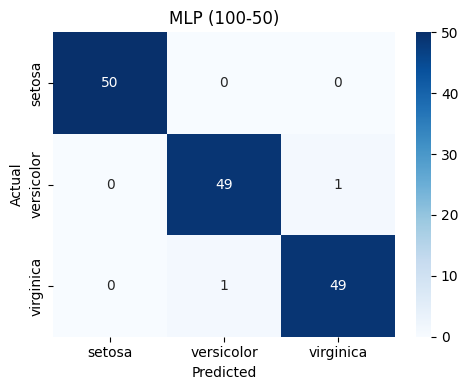

In [42]:
from sklearn.neural_network import MLPClassifier

acc, f1 = evaluate(
    'MLP (100-50)',
    MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    X_scaled, y
)
results.append({'Модель': 'MLP', 'Accuracy': acc, 'F1': f1})

## 5. Дерево решений

 Дерево решений (max_depth=4)
 Accuracy:  0.9933
 F1 (macro):0.9933
 Precision: 0.9935
 Recall:    0.9933


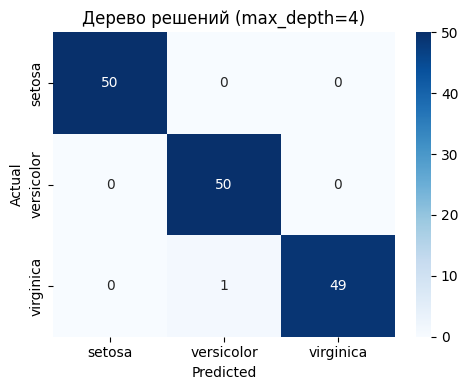

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
acc, f1 = evaluate('Дерево решений (max_depth=4)', dt, X, y)
results.append({'Модель': 'Decision Tree', 'Accuracy': acc, 'F1': f1})

# plt.figure(figsize=(14, 6))
# plot_tree(dt, feature_names=iris.feature_names, class_names=class_names,
#           filled=True, rounded=True, fontsize=9)
# plt.title('Структура дерева решений')
# plt.tight_layout()
# plt.show()

## 6. Наивный байесовский классификатор

 Наивный Байес (GaussianNB)
 Accuracy:  0.9600
 F1 (macro):0.9600
 Precision: 0.9600
 Recall:    0.9600


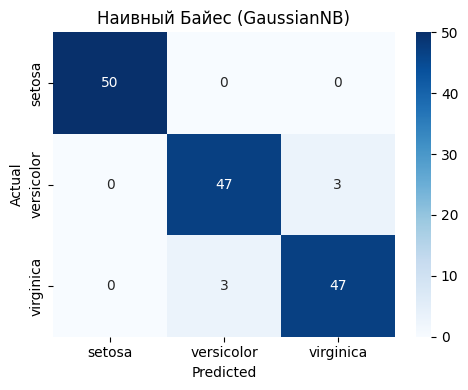

In [44]:
from sklearn.naive_bayes import GaussianNB

acc, f1 = evaluate('Наивный Байес (GaussianNB)', GaussianNB(), X, y)
results.append({'Модель': 'Naive Bayes', 'Accuracy': acc, 'F1': f1})

## 7. Дополнительные модели (*)

 Пассивно-агрессивный
 Accuracy:  0.9600
 F1 (macro):0.9600
 Precision: 0.9605
 Recall:    0.9600


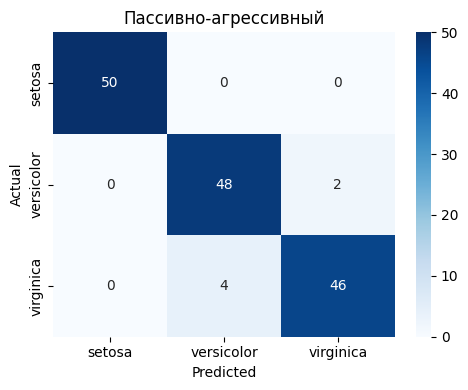

 Гребневый (Ridge)
 Accuracy:  0.8467
 F1 (macro):0.8448
 Precision: 0.8558
 Recall:    0.8467


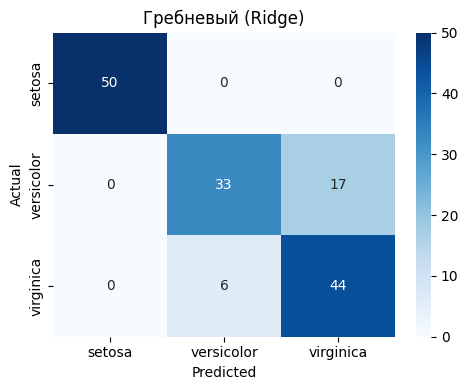

 Случайный лес (n=100)
 Accuracy:  1.0000
 F1 (macro):1.0000
 Precision: 1.0000
 Recall:    1.0000


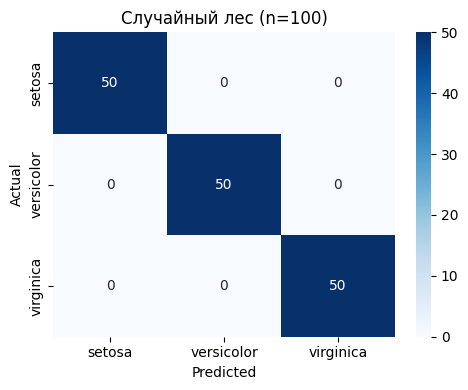

 Бэггинг (n=20)
 Accuracy:  1.0000
 F1 (macro):1.0000
 Precision: 1.0000
 Recall:    1.0000


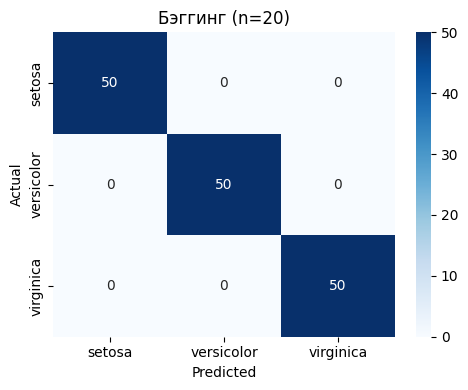

 Градиентный бустинг
 Accuracy:  1.0000
 F1 (macro):1.0000
 Precision: 1.0000
 Recall:    1.0000


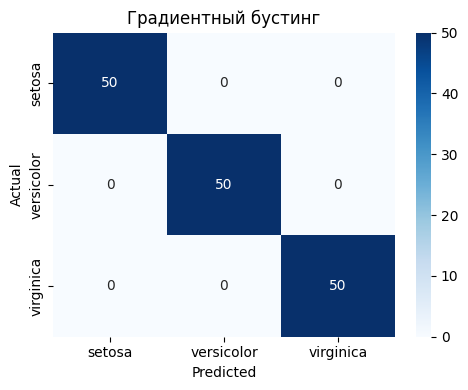

In [45]:
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

# 7.1 Пассивно-агрессивный
acc, f1 = evaluate('Пассивно-агрессивный', PassiveAggressiveClassifier(max_iter=1000, C=0.5), X_scaled, y)
results.append({'Модель': 'Passive-Aggressive', 'Accuracy': acc, 'F1': f1})

# 7.2 Гребневый
acc, f1 = evaluate('Гребневый (Ridge)', RidgeClassifier(alpha=1.0), X_scaled, y)
results.append({'Модель': 'Ridge', 'Accuracy': acc, 'F1': f1})

# 7.3 Случайный лес
acc, f1 = evaluate('Случайный лес (n=100)', RandomForestClassifier(n_estimators=100, random_state=42), X, y)
results.append({'Модель': 'Random Forest', 'Accuracy': acc, 'F1': f1})

# 7.4 Бэггинг
acc, f1 = evaluate('Бэггинг (n=20)', BaggingClassifier(n_estimators=20, random_state=42), X, y)
results.append({'Модель': 'Bagging', 'Accuracy': acc, 'F1': f1})

# 7.5 Градиентный бустинг
acc, f1 = evaluate('Градиентный бустинг', GradientBoostingClassifier(n_estimators=100, random_state=42), X, y)
results.append({'Модель': 'Gradient Boosting', 'Accuracy': acc, 'F1': f1})

## Итоговое сравнение всех моделей

,Модель,Accuracy,F1
1,Gradient Boosting,1.0000,1.0000
2,Bagging,1.0000,1.0000
3,Random Forest,1.0000,1.0000
4,Decision Tree,0.9933,0.9933
5,SVM linear,0.9867,0.9867
6,MLP,0.9867,0.9867
7,SVM RBF,0.9733,0.9733
8,Naive Bayes,0.9600,0.9600
9,Passive-Aggressive,0.9600,0.9600
10,SVM poly,0.9533,0.9531


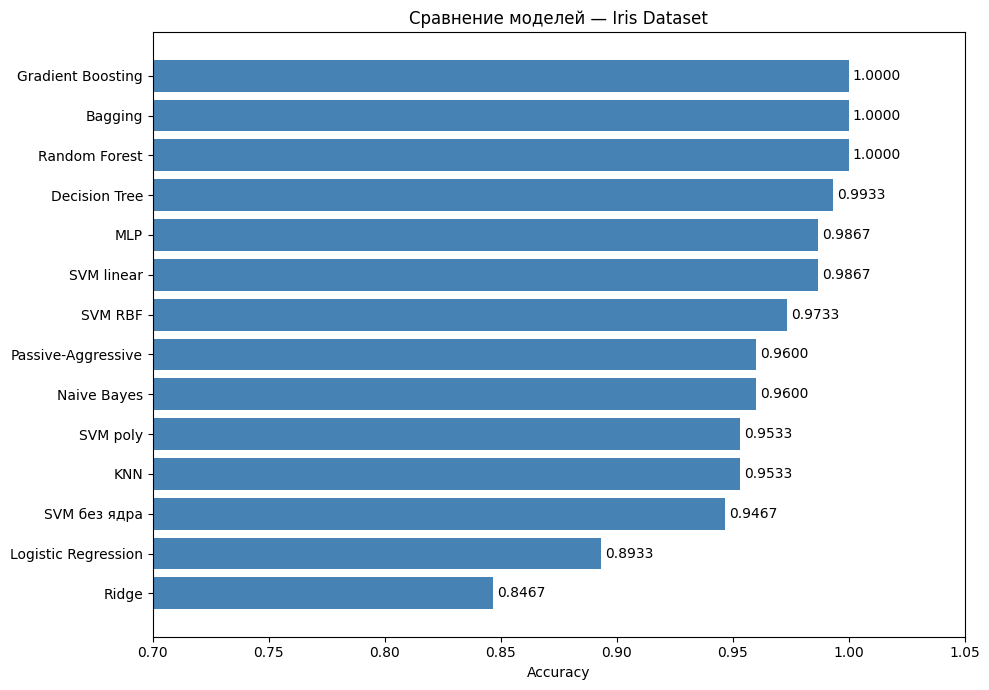

In [47]:
df_results = pd.DataFrame(results).sort_values('Accuracy', ascending=False).reset_index(drop=True)
df_results.index += 1
df_results['Accuracy'] = df_results['Accuracy'].map('{:.4f}'.format)
df_results['F1'] = df_results['F1'].map('{:.4f}'.format)
display(df_results)

df_plot = pd.DataFrame(results).sort_values('Accuracy', ascending=True)
plt.figure(figsize=(10, 7))
bars = plt.barh(df_plot['Модель'], df_plot['Accuracy'], color='steelblue')
plt.bar_label(bars, fmt='%.4f', padding=3)
plt.xlabel('Accuracy')
plt.title('Сравнение моделей — Iris Dataset')
plt.xlim(0.7, 1.05)
plt.tight_layout()
plt.show()